In [82]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [83]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\302-26\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


In [84]:
data = pd.read_csv(r"C:\Users\302-26\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv", encoding="CP949")
print(data.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [85]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [86]:
data = data.drop(columns=['id', 'Unnamed: 32'])
mean_col = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
worst_col = ['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 
        'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
 
BRST_mean = data[mean_col]

BRST_worst = data[worst_col]

print(BRST_mean.info())
print(BRST_worst.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                   Non-Null Cou

In [87]:
#Y 피쳐 변환

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# 독립변수(X)와 종속변수(y) 설정
X = data.drop(columns=['diagnosis']) #진단제외
y = data['diagnosis']

#데이터분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train 데이터 크기:", X_train.shape, y_train.shape) #455
print("Test 데이터 크기:", X_test.shape, y_test.shape) #114

Train 데이터 크기: (455, 30) (455,)
Test 데이터 크기: (114, 30) (114,)


In [ ]:
from sklearn import metrics 
#로지스틱 회귀 
logistic_model = LogisticRegression(solver='lbfgs', max_iter=3000)
    
logistic_model.fit(X_train, y_train)
    
predicted = logistic_model.predict(X_test)
    
    
print("예측 결과 :", predicted[:10])
print('LogisticRegression: %.2f' % (metrics.accuracy_score(predicted, y_test)*100))


예측 결과 : [0 1 0 1 1 0 0 0 0 0]
LogisticRegression: 93.86


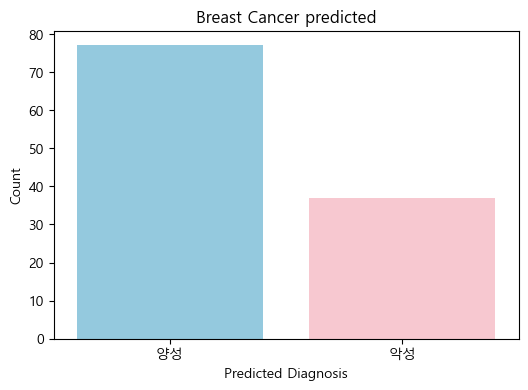

In [89]:
# count plot 그리기
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

pred_df = pd.DataFrame(predicted, columns=['Predicted diagnosis'])
plt.figure(figsize=(6, 4))
sns.countplot(x=pred_df['Predicted diagnosis'], palette=['skyblue', 'pink'])

# x축 라벨 변경 (0: 양성, 1: 악성)
plt.xticks(ticks=[0, 1], labels=['양성', '악성'])
plt.xlabel("Predicted Diagnosis")
plt.ylabel("Count")
plt.title("Breast Cancer predicted")
plt.show()